<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/LSTM_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 5

## LSTM Models

### Tensorflow

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


Load and Prepare Data

In [3]:
# Cek kolom yang ada dalam dataframe
print(df.columns)


Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


In [7]:
# Membaca data
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/04.%20Week%204/Dataset/ReviewTokoBaju.csv"
df = pd.read_csv(url)

# Menangani nilai NaN dan memastikan semua data dalam bentuk string
df['Review Text'] = df['Review Text'].fillna('').astype(str)

# Menyiapkan X dan y
X = df['Review Text']
y = (df['Rating'] > 3).astype(int)  # Membuat label biner

# Tokenisasi dan padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, padding='post', maxlen=100)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)


Build the LSTM Model

In [10]:
# Membangun model LSTM
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))  # Embedding layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer
model.add(Dense(64, activation='relu'))  # Dense layer untuk representasi lebih
model.add(Dropout(0.5))  # Dropout untuk mencegah overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer untuk klasifikasi biner


Compile and Train the Model

In [11]:
# Menyusun model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 105s 340ms/step - accuracy: 0.7741 - loss: 0.5533 - val_accuracy: 0.7680 - val_loss: 0.5376
Epoch 2/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 142s 340ms/step - accuracy: 0.7762 - loss: 0.5237 - val_accuracy: 0.7680 - val_loss: 0.5206
Epoch 3/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 100s 339ms/step - accuracy: 0.7741 - loss: 0.5144 - val_accuracy: 0.7680 - val_loss: 0.5234
Epoch 4/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 100s 338ms/step - accuracy: 0.7794 - loss: 0.5163 - val_accuracy: 0.8570 - val_loss: 0.3480
Epoch 5/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 147s 355ms/step - accuracy: 0.8301 - loss: 0.3259 - val_accuracy: 0.8755 - val_loss: 0.3246
Epoch 6/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 138s 343ms/step - accuracy: 0.8618 - loss: 0.2628 - val_accuracy: 0.8744 - val_loss: 0.3546
Epoch 7/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 139s 334ms/step - accuracy: 0.9202 - loss: 0.2290 - val_accuracy: 0.8734 - val_loss: 0.3232
Epoch 8/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 144s 341ms/step - accuracy: 0.9312 -

Evaluate the Model

147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1090
           1       0.92      0.92      0.92      3608

    accuracy                           0.87      4698
   macro avg       0.82      0.82      0.82      4698
weighted avg       0.87      0.87      0.87      4698

AUC Score: 0.819339286804044


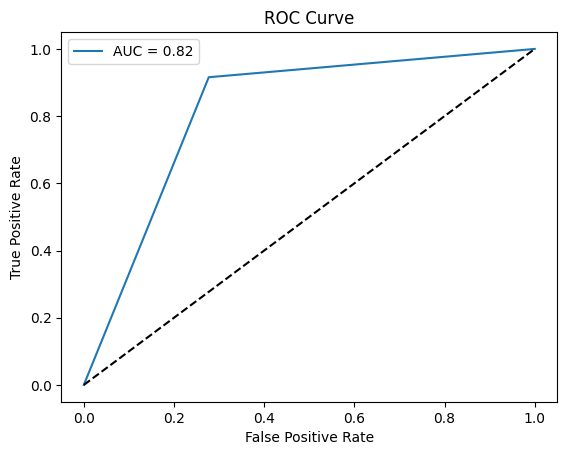

In [12]:
# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")  # Mengubah prediksi ke dalam format 0/1

# Classification report
print(classification_report(y_test, y_pred))

# AUC Score
print("AUC Score:", roc_auc_score(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Plot Training History (Accuracy and Loss)

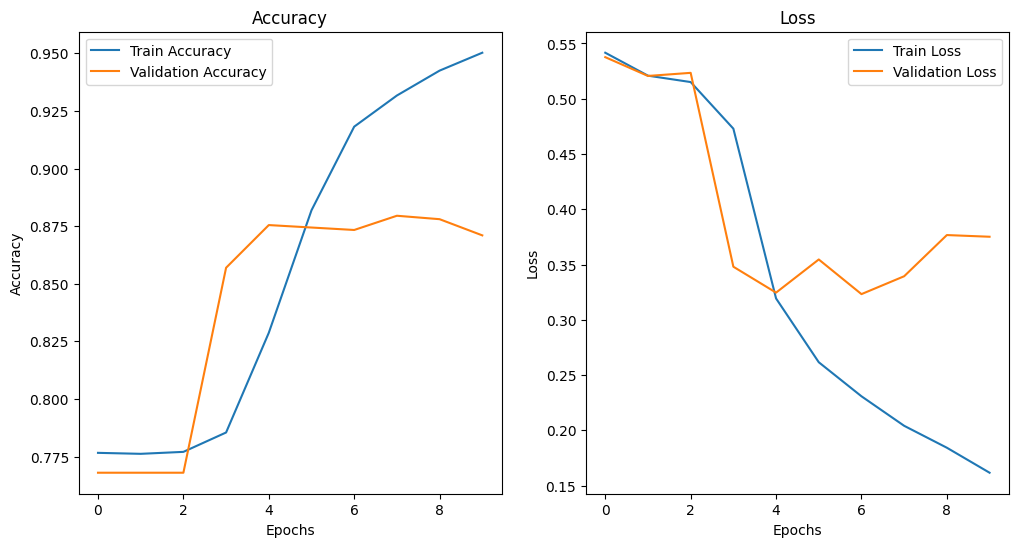

In [13]:
# Plotting accuracy and loss curves
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Pytroch

Import Library

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Load dan Persiapan Data

In [16]:
# Load dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/04.%20Week%204/Dataset/ReviewTokoBaju.csv"
df = pd.read_csv(url)

# Ambil kolom yang diperlukan
df = df[['Review Text', 'Recommended IND']].dropna()
X = df['Review Text'].astype(str)
y = df['Recommended IND'].values


Tokenisasi dan Padding

In [17]:
# Tokenisasi
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100, padding='post')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)


Konversi ke Tensor

In [18]:
# Convert to tensor
X_train_t = torch.tensor(X_train, dtype=torch.long)
X_test_t = torch.tensor(X_test, dtype=torch.long)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

# Dataset dan DataLoader
train_data = TensorDataset(X_train_t, y_train_t)
test_data = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)


Arsitektur Model LSTM

In [19]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        _, (hidden, _) = self.lstm(embedded)
        out = self.fc(hidden[-1])
        return self.sigmoid(out).squeeze()


Training Model

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(vocab_size=10000, embed_dim=128, hidden_dim=64).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted = (outputs > 0.5).float()
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    acc = correct / total
    print(f"Epoch {epoch+1}: Loss={total_loss:.4f}, Accuracy={acc:.4f}")


Epoch 1: Loss=135.9152, Accuracy=0.8161
Epoch 2: Loss=133.6439, Accuracy=0.8184
Epoch 3: Loss=112.6112, Accuracy=0.8311
Epoch 4: Loss=75.8951, Accuracy=0.8860
Epoch 5: Loss=59.3877, Accuracy=0.9157
Epoch 6: Loss=48.3707, Accuracy=0.9342
Epoch 7: Loss=39.9322, Accuracy=0.9495
Epoch 8: Loss=32.0599, Accuracy=0.9616
Epoch 9: Loss=25.5086, Accuracy=0.9706
Epoch 10: Loss=20.0176, Accuracy=0.9790


Evaluasi Model

              precision    recall  f1-score   support

         0.0       0.73      0.55      0.63       812
         1.0       0.91      0.96      0.93      3717

    accuracy                           0.88      4529
   macro avg       0.82      0.75      0.78      4529
weighted avg       0.88      0.88      0.88      4529

AUC Score: 0.9040682803415542


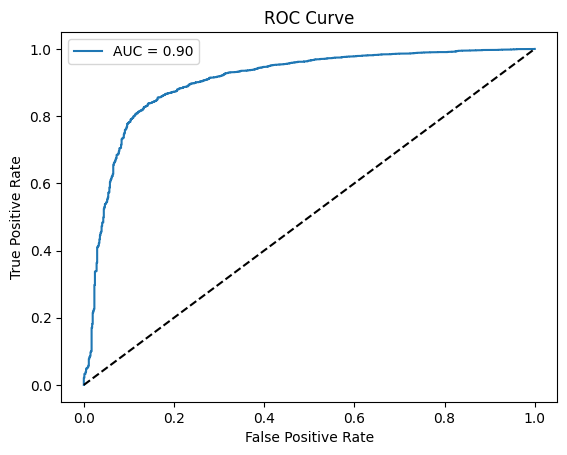

In [21]:
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch = x_batch.to(device)
        preds = model(x_batch).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(y_batch.numpy())

y_pred = np.array(all_preds) > 0.5
y_true = np.array(all_labels)

print(classification_report(y_true, y_pred))
print("AUC Score:", roc_auc_score(y_true, all_preds))

fpr, tpr, _ = roc_curve(y_true, all_preds)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_true, all_preds):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Persamaan Matematika

Forget Gate: Menentukan informasi lama yang dibuang
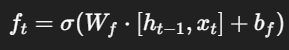

Input Gate: Menentukan informasi baru yang akan disimpan

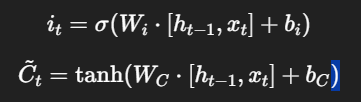

Cell State Update: Gabungkan informasi lama dan baru

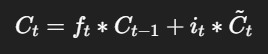

Output Gate: Menentukan output dari cell

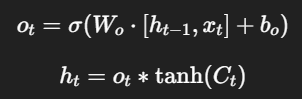

Keterangan Simbol:

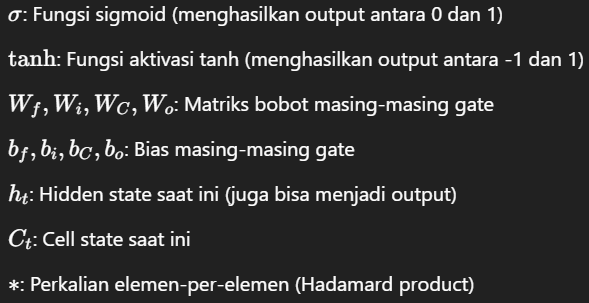